In [64]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import json
import os

def calc_video_acc(all_preds: dict[str, list]) -> float:
	correct = 0
	for label, preds in all_preds.values():
		pred = max(preds, key=preds.count)
		if pred == label:
			correct += 1
	return correct / len(all_preds)

In [65]:
results_folder = '../../results/'

## Confusion Matrix - By Frame

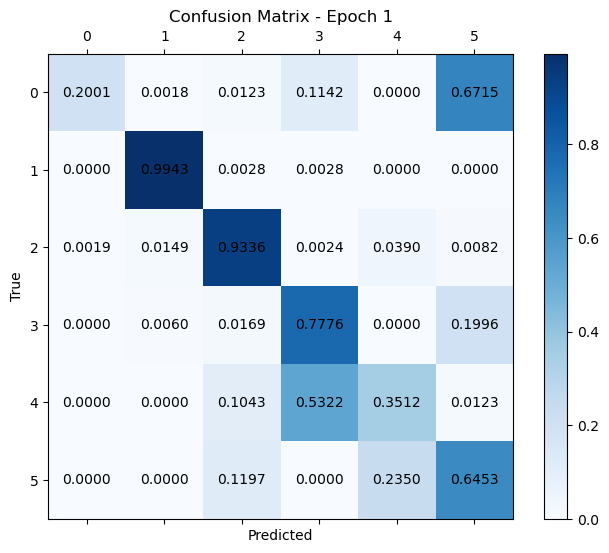

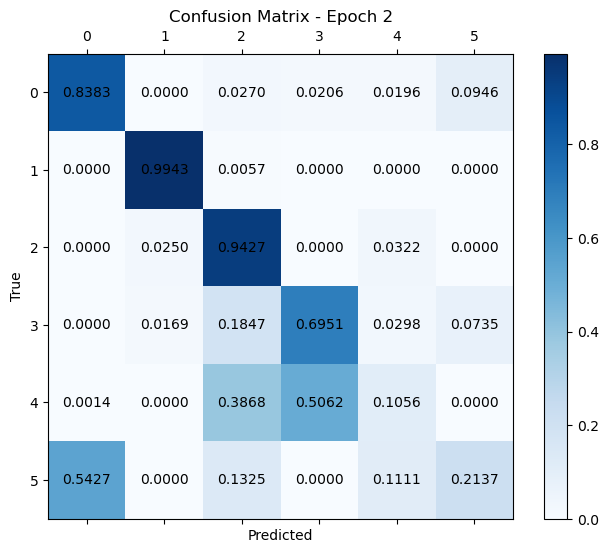

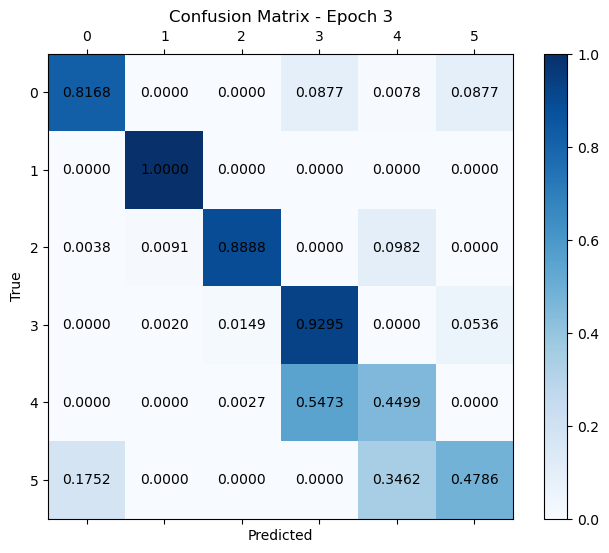

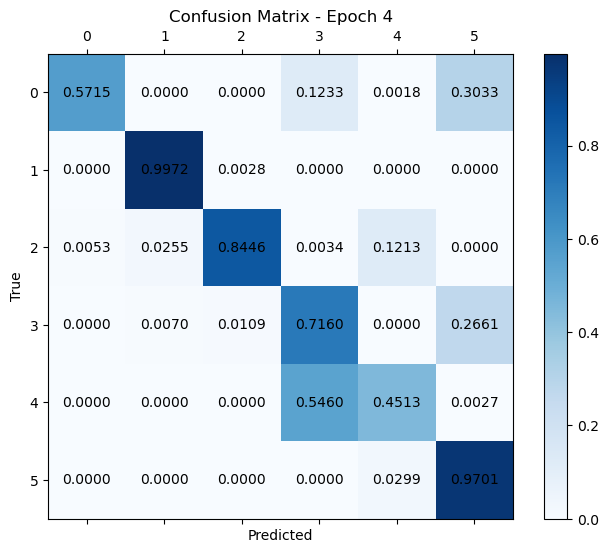

In [66]:
def plot_confusion_matrix(cm, epoch):
	plt.figure(figsize=(8, 6))
	plt.matshow(cm, cmap='Blues', fignum=1)
	plt.colorbar()
	for (i, j), val in np.ndenumerate(cm):
		plt.text(j, i, f'{val:.4f}' if isinstance(val, np.floating) else f'{val}', ha='center', va='center')
	plt.xlabel('Predicted')
	plt.ylabel('True')
	plt.title(f'Confusion Matrix - Epoch {epoch + 1}')
	plt.show()

def parse_and_plot(json_data, use_percentages=False):
	labels = list(range(6))

	for epoch_idx, epoch_data in enumerate(json_data):
		true_labels = []
		pred_labels = []
		for true_label, predictions in epoch_data.values():
			true_labels.extend([true_label] * len(predictions))
			pred_labels.extend(predictions)

		cm = confusion_matrix(true_labels, pred_labels, labels=labels)
		if use_percentages:
			cm_percentage = cm / cm.sum(axis=1)[:, np.newaxis]
			plot_confusion_matrix(cm_percentage, epoch_idx)
		else:
			plot_confusion_matrix(cm, epoch_idx)

# Example JSON input
with open(os.path.join(results_folder, 'qnn_test_preds.json'), 'r') as f:
	json_input = json.load(f)

# Parse the JSON data and plot the confusion matrix for each epoch
parse_and_plot(json_input, True)

## Confusion Matrix - By Video

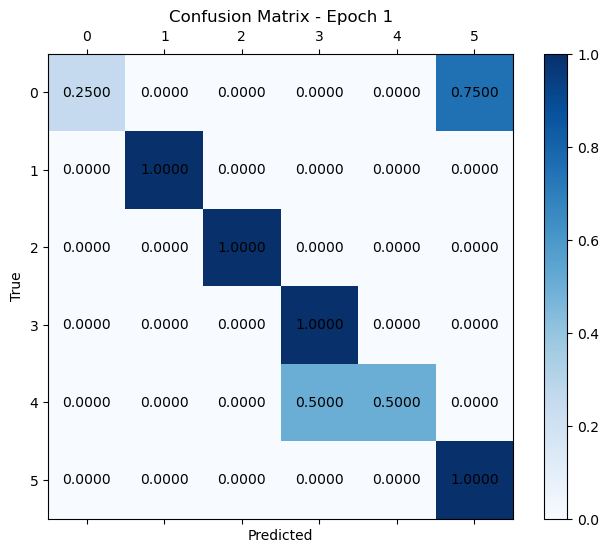

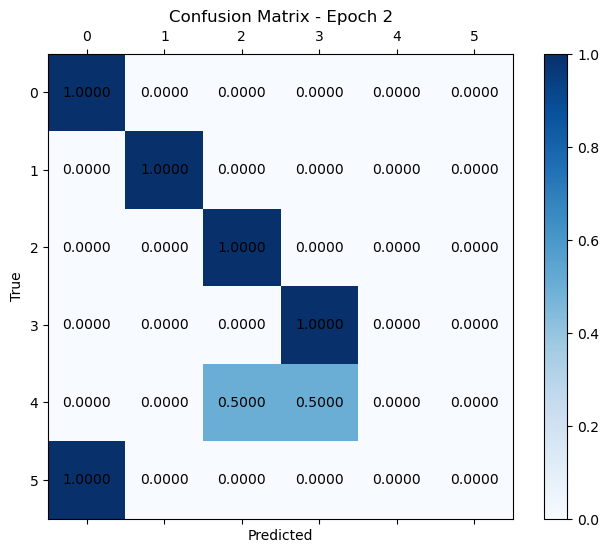

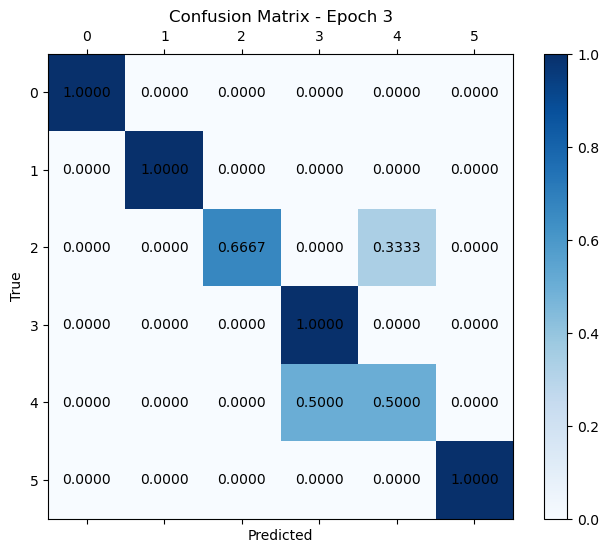

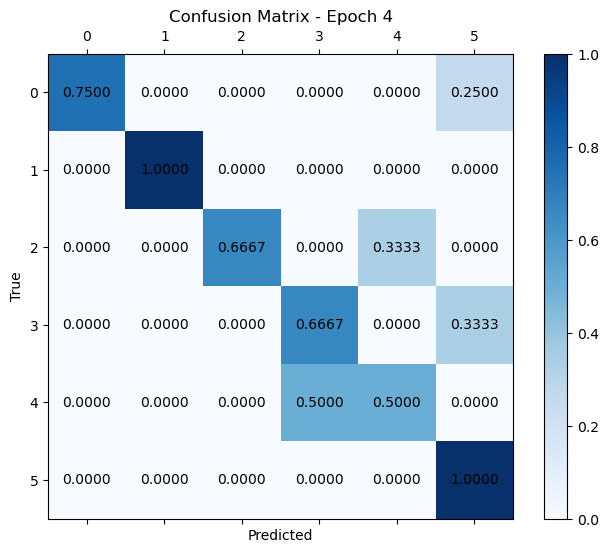

In [67]:
def plot_confusion_matrix(cm, epoch):
	plt.figure(figsize=(8, 6))
	plt.matshow(cm, cmap='Blues', fignum=1)
	plt.colorbar()
	for (i, j), val in np.ndenumerate(cm):
		plt.text(j, i, f'{val:.4f}' if isinstance(val, np.floating) else f'{val}', ha='center', va='center')
	plt.xlabel('Predicted')
	plt.ylabel('True')
	plt.title(f'Confusion Matrix - Epoch {epoch + 1}')
	plt.show()

def parse_and_plot(json_data, use_percentages=False):
	labels = list(range(6))

	for epoch_idx, epoch_data in enumerate(json_data):
		true_labels = []
		pred_labels = []
		for true_label, predictions in epoch_data.values():
			true_labels.append(true_label)
			pred_labels.append(max(predictions, key=predictions.count))

		cm = confusion_matrix(true_labels, pred_labels, labels=labels)
		if use_percentages:
			cm_percentage = cm / cm.sum(axis=1)[:, np.newaxis]
			plot_confusion_matrix(cm_percentage, epoch_idx)
		else:
			plot_confusion_matrix(cm, epoch_idx)

# Example JSON input
with open(os.path.join(results_folder, 'qnn_test_preds.json'), 'r') as f:
	json_input = json.load(f)

# Parse the JSON data and plot the confusion matrix for each epoch
parse_and_plot(json_input, True)

## Training Graphs

In [68]:
def plot_metrics(data, title):
	plt.title(title)
	loss = [epoch['loss'] for epoch in data]
	accuracy = [epoch['accuracy'] for epoch in data]
	video_acc = [epoch['video_acc'] for epoch in data]

	plt.plot(loss, label='Loss')
	plt.plot(accuracy, label='Accuracy')
	plt.plot(video_acc, label='Accuracy with Voting')
	plt.xticks(np.arange(len(data)), np.arange(len(data)) + 1)
	plt.legend()
	plt.show()

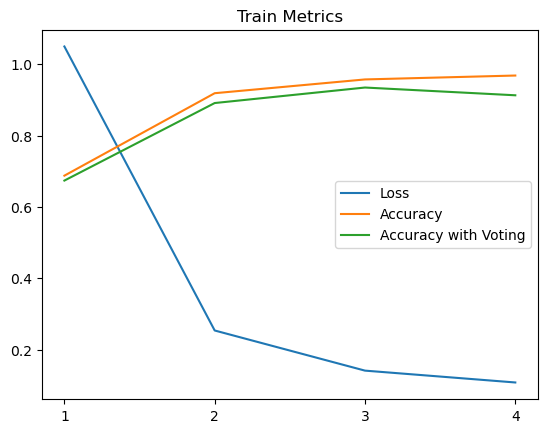

In [69]:
with open(os.path.join(results_folder, 'qnn_train_metrics.json'), 'r') as f:
	train_metrics = json.load(f)
plot_metrics(train_metrics, 'Train Metrics')

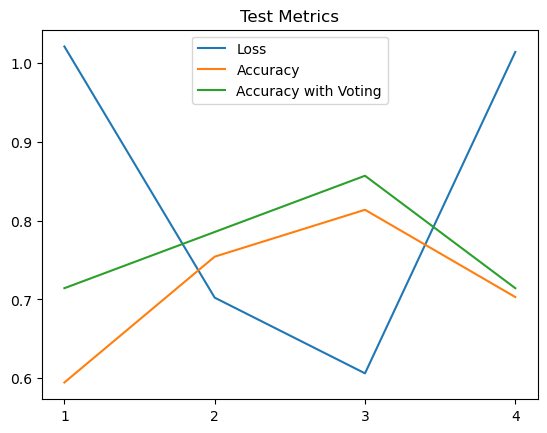

In [70]:
with open(os.path.join(results_folder, 'qnn_test_metrics.json'), 'r') as f:
	test_metrics = json.load(f)
plot_metrics(test_metrics, 'Test Metrics')

## Other Statistics - By Frame

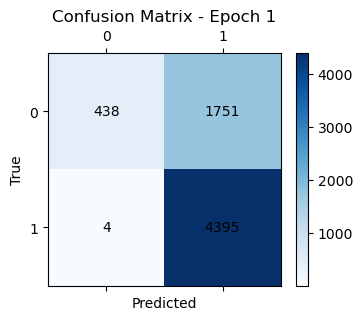

Precision: 0.7150992515457208
Recall: 0.999090702432371
F1 Score: 0.833570412517781


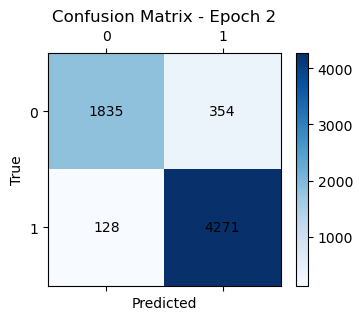

Precision: 0.9234594594594595
Recall: 0.9709024778358718
F1 Score: 0.9465868794326241


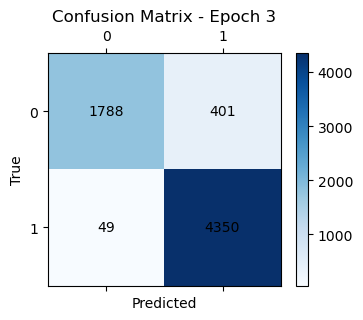

Precision: 0.9155967164807409
Recall: 0.9888611047965447
F1 Score: 0.9508196721311475


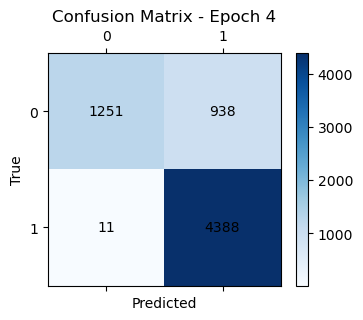

Precision: 0.8238828389034923
Recall: 0.9974994316890202
F1 Score: 0.9024164524421594


In [71]:
def plot_confusion_matrix(cm, epoch):
	plt.figure(figsize=(4, 3))
	plt.matshow(cm, cmap='Blues', fignum=1)
	plt.colorbar()
	for (i, j), val in np.ndenumerate(cm):
		plt.text(j, i, f'{val:.4f}' if isinstance(val, np.floating) else f'{val}', ha='center', va='center')
	plt.xlabel('Predicted')
	plt.ylabel('True')
	plt.title(f'Confusion Matrix - Epoch {epoch + 1}')
	plt.show()
	

def generate_statistics(cm):
	TN = cm[0][0]
	TP = cm[1][1]
	FN = cm[1][0]
	FP = cm[0][1]
	precision = TP / (TP + FP)
	recall = TP / (TP + FN)
	F1 = (2 * precision * recall) / (precision + recall)
	print(f'Precision: {precision}')
	print(f'Recall: {recall}')
	print(f'F1 Score: {F1}')


def parse_and_plot(json_data, use_percentages=False):
	labels = list(range(2))

	for epoch_idx, epoch_data in enumerate(json_data):
		true_labels = []
		pred_labels = []
		for true_label, predictions in epoch_data.values():
			true_labels.extend([0 if true_label == 0 else 1] * len(predictions))
			pred_labels.extend([0 if prediction == 0 else 1 for prediction in predictions])

		cm = confusion_matrix(true_labels, pred_labels, labels=labels)

		if use_percentages:
			cm_percentage = cm / cm.sum(axis=1)[:, np.newaxis]
			plot_confusion_matrix(cm_percentage, epoch_idx)
		else:
			plot_confusion_matrix(cm, epoch_idx)

		generate_statistics(cm)

# Example JSON input
with open(os.path.join(results_folder, 'qnn_test_preds.json'), 'r') as f:
	json_input = json.load(f)

# Parse the JSON data and plot the confusion matrix for each epoch
parse_and_plot(json_input, False)

## Other Statistics - By Video

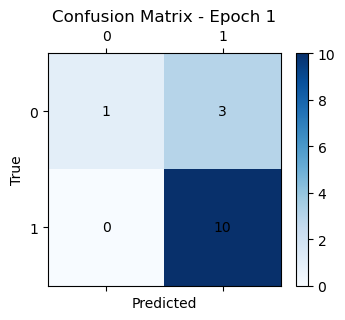

Precision: 0.7692307692307693
Recall: 1.0
F1 Score: 0.8695652173913044


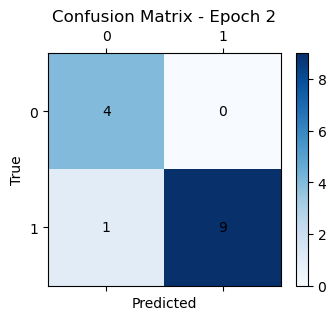

Precision: 1.0
Recall: 0.9
F1 Score: 0.9473684210526316


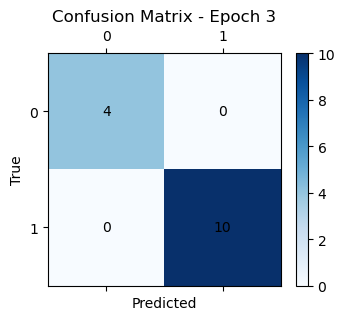

Precision: 1.0
Recall: 1.0
F1 Score: 1.0


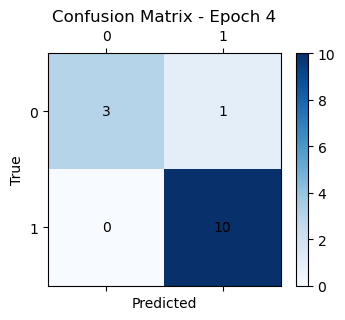

Precision: 0.9090909090909091
Recall: 1.0
F1 Score: 0.9523809523809523


In [72]:
def plot_confusion_matrix(cm, epoch):
	plt.figure(figsize=(4, 3))
	plt.matshow(cm, cmap='Blues', fignum=1)
	plt.colorbar()
	for (i, j), val in np.ndenumerate(cm):
		plt.text(j, i, f'{val:.4f}' if isinstance(val, np.floating) else f'{val}', ha='center', va='center')
	plt.xlabel('Predicted')
	plt.ylabel('True')
	plt.title(f'Confusion Matrix - Epoch {epoch + 1}')
	plt.show()
	

def generate_statistics(cm):
	TN = cm[0][0]
	TP = cm[1][1]
	FN = cm[1][0]
	FP = cm[0][1]
	precision = TP / (TP + FP)
	recall = TP / (TP + FN)
	F1 = (2 * precision * recall) / (precision + recall)
	print(f'Precision: {precision}')
	print(f'Recall: {recall}')
	print(f'F1 Score: {F1}')


def parse_and_plot(json_data, use_percentages=False):
	labels = list(range(2))

	for epoch_idx, epoch_data in enumerate(json_data):
		true_labels = []
		pred_labels = []
		for true_label, predictions in epoch_data.values():
			true_labels.append(0 if true_label == 0 else 1)
			pred_labels.append(0 if max(predictions, key=predictions.count) == 0 else 1)

		cm = confusion_matrix(true_labels, pred_labels, labels=labels)

		if use_percentages:
			cm_percentage = cm / cm.sum(axis=1)[:, np.newaxis]
			plot_confusion_matrix(cm_percentage, epoch_idx)
		else:
			plot_confusion_matrix(cm, epoch_idx)

		generate_statistics(cm)

# Example JSON input
with open(os.path.join(results_folder, 'qnn_test_preds.json'), 'r') as f:
	json_input = json.load(f)

# Parse the JSON data and plot the confusion matrix for each epoch
parse_and_plot(json_input, False)